In [44]:
#грузим датасет
import pandas as pd
dataframe = pd.read_csv('C://Users/Uldum/Downloads/data.csv', low_memory = False)

In [46]:
# смотрим поверхностно на данные. Видим разные типы данных + множество пропущенных значений.
dataframe.head(5)

,id,class,c1,c2,c3,c4,c5,c6,c7,c8,...,c53,c54,c55,c56,c57,c58,c59,c60,created_at,updated_at
0,1,545988074,0,0,0,правое,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,545988074,0,0,0,правое,NaN,NaN,NaN,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,647859449,1014559500,33652,-1898910370,левое,9,50.0,14,953176870.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,647859449,1017330063,33655,-645229505,левое,Не предъявляется,50.0,14,-699300431.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,647859449,1482170768,1017353208,-826554069,левое,Не предъявляется,50.0,14,953176870.0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# продолжаем оценку данных. Колонок типа object - категориальных, довольно много. Есть колонка с id, нулевые колонки
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15403 entries, 0 to 15402
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15403 non-null  int64  
 1   class       15403 non-null  int64  
 2   c1          15403 non-null  int64  
 3   c2          15403 non-null  int64  
 4   c3          15403 non-null  int64  
 5   c4          15403 non-null  object 
 6   c5          15401 non-null  object 
 7   c6          15401 non-null  float64
 8   c7          41 non-null     object 
 9   c8          15401 non-null  float64
 10  c9          15403 non-null  int64  
 11  c10         0 non-null      float64
 12  c11         0 non-null      float64
 13  c12         768 non-null    object 
 14  c13         0 non-null      float64
 15  c14         15401 non-null  object 
 16  c15         7683 non-null   object 
 17  c16         0 non-null      float64
 18  c17         15401 non-null  object 
 19  c18         15401 non-nul

In [48]:
#сбрасываем колонку с id
dataframe = dataframe.drop(['id'], axis=1)

In [70]:
# сбрасываем дубликаты строк
dataframe = dataframe.drop_duplicates()

In [71]:
# так как колонок с категориальными значениями много, то выберем парочку для обработки. Остальное отбросим. Нет смысла ради
# тестового задания терять столько времени. На оставшиеся данные применим алгоритм кластеризации.
# смотрим какие значения и сколько содержатся в колонке c4
dataframe['c4'].value_counts()

левое     15396
правое        6
Name: c4, dtype: int64

In [149]:
# смотрим на колонку c47. Заполнена одним и тем же значением. Бессмысленно. Уберём.
dataframe['c47'].value_counts()

16.0    15401
Name: c47, dtype: int64

In [150]:
# c43 туда же.
dataframe['c43'].value_counts()

18    15402
Name: c43, dtype: int64

In [72]:
# преобразуем колонку с категориальными значениями в нумерик. Используем встроенный метод библиотеки sckitlearn
from sklearn.preprocessing import OneHotEncoder
# создаём экземпляр класса энкодера
oe_style = OneHotEncoder()

In [73]:
# заполняем нужной колонкой переменную с энкодером, выводим массив значений 0 и 1 - левое и правое.
oe_results = oe_style.fit_transform(dataframe[["c4"]])
oe_results.toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [96]:
# из массива получим датафрейм с колонками Left и right
pd.DataFrame(oe_results.toarray(), columns=['C4_l', 'c4_r']).head()

,C4_l,c4_r
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


In [109]:
# соединим полученный датафрейм с исходным датафреймом с помощью join. Выведем первые строки нового дф.
obj_df = dataframe.join(pd.DataFrame(oe_results.toarray(), columns=['C4_l', 'c4_r']))
obj_df.head()

,class,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c55,c56,c57,c58,c59,c60,created_at,updated_at,C4_l,c4_r
0,545988074,0,0,0,правое,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
2,647859449,1014559500,33652,-1898910370,левое,9,50.0,14,9.531769e+08,1175637482,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,647859449,1017330063,33655,-645229505,левое,Не предъявляется,50.0,14,-6.993004e+08,438320836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,647859449,1482170768,1017353208,-826554069,левое,Не предъявляется,50.0,14,9.531769e+08,1204266630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
5,647859449,-1568968858,1044374,634662849,правое,Не предъявляется,250.0,2242,1.756160e+09,466949963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [110]:
# сбросим категориальную колонку, которую преобразовали в числовые значения.
obj_df = obj_df.drop(['c4'], axis=1)
obj_df.head()

,class,c1,c2,c3,c5,c6,c7,c8,c9,c10,...,c55,c56,c57,c58,c59,c60,created_at,updated_at,C4_l,c4_r
0,545988074,0,0,0,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
2,647859449,1014559500,33652,-1898910370,9,50.0,14,9.531769e+08,1175637482,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,647859449,1017330063,33655,-645229505,Не предъявляется,50.0,14,-6.993004e+08,438320836,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,647859449,1482170768,1017353208,-826554069,Не предъявляется,50.0,14,9.531769e+08,1204266630,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
5,647859449,-1568968858,1044374,634662849,Не предъявляется,250.0,2242,1.756160e+09,466949963,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [111]:
# теперь взглянем на колонку c5. Не понятно, что это за значения. Но скорее всего какой-то ряд константных уровней, от 0 -
# Не предъявляется, до 100. Нужно перевести всё в числовую форму и заменить на 0 Не предъявляется.
obj_df['c5'].value_counts()

100                 7680
30                  6912
50                   768
Не предъявляется      35
9                      6
Name: c5, dtype: int64

In [ ]:
# Сначала посмотрим незаполненные значения в колонке. Видим 1 строку.

In [112]:
obj_df['c5'].isnull().sum()

1

In [113]:
# заполним эту строку наиболее часто встречающимся значением в колонке. В этом случае - 100.
obj_df['c5'] = obj_df['c5'].fillna(obj_df['c5'].value_counts().index[0])
obj_df.head()

,class,c1,c2,c3,c5,c6,c7,c8,c9,c10,...,c55,c56,c57,c58,c59,c60,created_at,updated_at,C4_l,c4_r
0,545988074,0,0,0,100,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
2,647859449,1014559500,33652,-1898910370,9,50.0,14,9.531769e+08,1175637482,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,647859449,1017330063,33655,-645229505,Не предъявляется,50.0,14,-6.993004e+08,438320836,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,647859449,1482170768,1017353208,-826554069,Не предъявляется,50.0,14,9.531769e+08,1204266630,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
5,647859449,-1568968858,1044374,634662849,Не предъявляется,250.0,2242,1.756160e+09,466949963,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [114]:
# теперь напишем примитивную функцию, которая будет принимать на входе текст,пытаться применить к нему числовой тип данных,
# а если потерпит неудачу, то возвратит 0. Так если мы встретим числа в формате строки, то они приобразуются в числа, 
# а если строку Не предъявляется, то заменим её на 0.
def cat_to_num(text):
  try:  
    return int(text)
  except:
    return 0

# применяем функцию к колонке методом apply. Смотрим значения в колонке.
obj_df['c5'] = obj_df['c5'].apply(cat_to_num)
obj_df['c5'].value_counts()

100    7681
30     6912
50      768
0        35
9         6
Name: c5, dtype: int64

In [152]:
# выведем инфу, посмотреть какие колонки ушли, какие появились, какие изменили тип
obj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15402 entries, 0 to 15402
Data columns (total 64 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       15402 non-null  int64  
 1   c1          15402 non-null  int64  
 2   c2          15402 non-null  int64  
 3   c3          15402 non-null  int64  
 4   c5          15402 non-null  int64  
 5   c6          15401 non-null  float64
 6   c7          41 non-null     object 
 7   c8          15401 non-null  float64
 8   c9          15402 non-null  int64  
 9   c10         0 non-null      float64
 10  c11         0 non-null      float64
 11  c12         768 non-null    object 
 12  c13         0 non-null      float64
 13  c14         15401 non-null  object 
 14  c15         7683 non-null   object 
 15  c16         0 non-null      float64
 16  c17         15401 non-null  object 
 17  c18         15401 non-null  object 
 18  c19         0 non-null      float64
 19  c20         15401 non-nul

In [190]:
# На этом этапе я решил избавится от колонок типа object, которые не собираюсь преобразовывать.  Применим метод 
# select-exclude
# также сразу дропнем колонки с43, с47, в которых ранее обнаружили одинаковые значения
df = obj_df.select_dtypes(exclude=['object'])
df = df.drop(['c43', 'c47'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15402 entries, 0 to 15402
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       15402 non-null  int64  
 1   c1          15402 non-null  int64  
 2   c2          15402 non-null  int64  
 3   c3          15402 non-null  int64  
 4   c5          15402 non-null  int64  
 5   c6          15401 non-null  float64
 6   c8          15401 non-null  float64
 7   c9          15402 non-null  int64  
 8   c10         0 non-null      float64
 9   c11         0 non-null      float64
 10  c13         0 non-null      float64
 11  c16         0 non-null      float64
 12  c19         0 non-null      float64
 13  c21         0 non-null      float64
 14  c22         15401 non-null  float64
 15  c23         15402 non-null  float64
 16  c24         0 non-null      float64
 17  c25         0 non-null      float64
 18  c26         5 non-null      float64
 19  c28         5 non-null   

In [191]:
# посмотрим на пропущенные значения по всем колокам. Довольно много колонок состоит только из них.
df.isna().sum()

class             0
c1                0
c2                0
c3                0
c5                0
c6                1
c8                1
c9                0
c10           15402
c11           15402
c13           15402
c16           15402
c19           15402
c21           15402
c22               1
c23               0
c24           15402
c25           15402
c26           15397
c28           15397
c29           15402
c30           15402
c31           15402
c32               2
c33           15402
c34           15402
c35           15402
c36           15393
c37           15402
c38           15402
c39           15402
c40               1
c41           15393
c42           15402
c44           15402
c45           15402
c46               1
c48               1
c49           15360
c50           15384
c51           15391
c52           15402
c53           15402
c54               0
created_at    15402
updated_at    15402
C4_l              1
c4_r              1
dtype: int64

In [192]:
# уберём сначала строки axis=0 с хотя бы 1 незаполненным значением. таким образом, исходя из информации выше, мы уберём
# единичные пропуски из колонок, в которых большинство значений заполненны. Останутся только колонки с полностью незаполне
# нными строкам.
df=df.dropna(axis=0,how='any', subset=['c6', 'c8', 'c22', 'c32', 'C4_l', 'c4_r'])
# затем уберём столбцы, которые содержат хотя бы 1 Nan значение. В нашем случае это будут только колонки со всеми Nan.
df=df.dropna(axis=1,how='any')
df.isna().sum()

class    0
c1       0
c2       0
c3       0
c5       0
c6       0
c8       0
c9       0
c22      0
c23      0
c32      0
c40      0
c46      0
c48      0
c54      0
C4_l     0
c4_r     0
dtype: int64

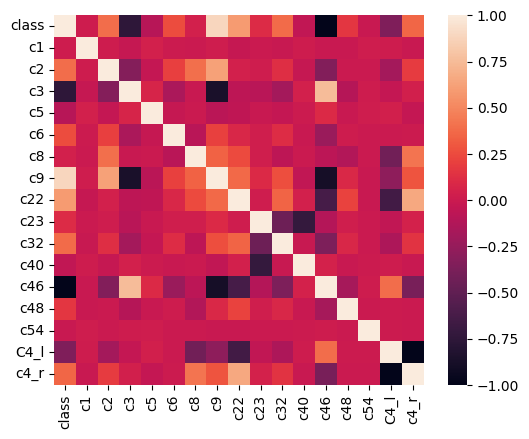

In [194]:
# обработку закончили, приступим к аналитической части. Построим тепловую карту корреляции значений разных колонок между
# собой. Чем светлее квадрат - тем больше корреляция между колонками
cor = df.corr()
sns.heatmap(cor, square = True)
df_inf = df

In [198]:
# займёмся препроцесингом данных для лучшего применения алгоритма на них. Отмасштабируем и нормализуем данные.
# все данные будут иметь среднее значение в районе нуля, а отклонение от -1 до 1. Так проще алгоритму.
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [199]:
X_normalized = normalize(X_scaled)

In [200]:
# данные после препроцессинга
df = pd.DataFrame(X_normalized)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.322326,0.013607,-0.001149,-0.634181,-0.027192,-0.049801,0.328953,0.505937,0.002980,0.024957,-0.015067,-0.020093,-0.353433,-0.000133,-0.004487,0.000296,-0.000296,0.011610
1,0.526514,0.022287,-0.001877,-0.351310,-0.051453,-0.081349,-0.394327,0.307362,0.064508,0.008358,-0.024611,-0.032821,-0.577326,-0.000217,-0.007329,0.000484,-0.000484,0.018965
2,0.184662,0.011329,0.477322,-0.157942,-0.018046,-0.028531,0.188459,0.296923,0.007684,0.002931,-0.008632,-0.011511,-0.202483,-0.000076,-0.002570,-0.522898,0.522898,0.006652
3,0.322158,0.013600,-0.001148,-0.633850,-0.027178,-0.049775,0.328781,0.505673,0.002978,0.040808,-0.015059,-0.020082,-0.353248,-0.000132,-0.004484,0.000296,-0.000296,0.011604
4,0.321891,0.013589,-0.001148,-0.633324,-0.027156,-0.049734,0.328509,0.505254,0.002976,0.057615,-0.015046,-0.020065,-0.352956,-0.000132,-0.004480,0.000296,-0.000296,0.011595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15394,-0.017454,0.385260,-0.006719,0.013226,0.339963,-0.348129,-0.000783,-0.015519,0.043883,-0.326772,0.300097,0.419520,0.017327,-0.002756,0.245025,0.006164,-0.006164,0.422916
15395,-0.018909,0.025111,-0.007279,0.014328,0.368284,-0.377130,-0.000848,-0.016812,0.047539,-0.353994,0.325097,0.454469,0.018771,-0.002986,0.265438,0.006678,-0.006678,0.458148
15396,-0.018619,0.410962,-0.007167,0.014108,0.362644,-0.004738,-0.000835,-0.016554,0.046810,-0.348572,0.320118,0.447509,0.018483,-0.002940,0.261372,0.006575,-0.006575,0.451131
15397,-0.020416,0.027113,-0.007859,0.015470,0.397641,-0.005195,-0.000916,-0.018152,0.051328,-0.382212,0.351011,0.490696,0.020267,-0.003224,0.286596,0.007210,-0.007210,0.494668


<AxesSubplot: >

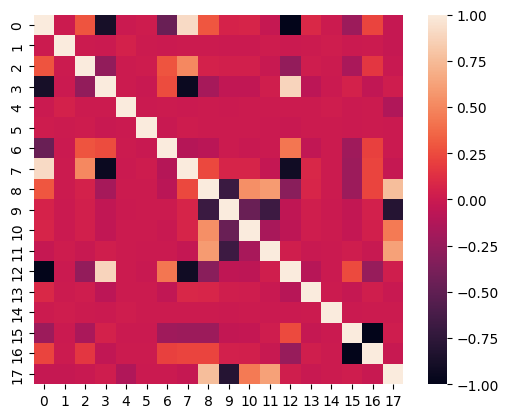

In [201]:
# на каком-то этапе решил ещё раз построить хитмап, чтобы убедится, что в основном корреляция осталась прежней.
import seaborn as sns
cor = df.corr()
sns.heatmap(cor, square = True)

In [ ]:
# далее пойдём пометодам кластеризации. Начнём с ward. Сначала для поиска оптимального числа кластеров воспользуемся
# методом локтя. Затем построим дендрогрмму и визуально убедимся в правильности подхода. Потом рассчитаем метрику
# silhouette для каждого метода. -1 - плохо, 0 - кластеры накладываются друг на друга, 1 - хорошо.

In [ ]:
Метод ward

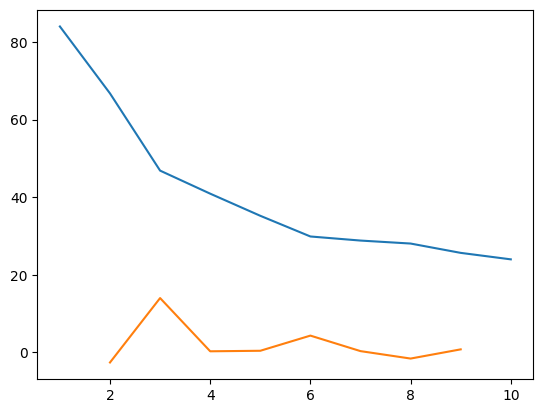

Рекомендованное количество кластеров: 3


In [212]:
# код отрисовки нагуглен. В целом, мы задаём метод и метрику, по которой определяется лучшее число кластеров.
# в остальном код не меняется. Метрику во всех методах будем использовать euclidean
from scipy.cluster.hierarchy import *
import numpy as np
from scipy.spatial.distance import pdist
data_dist = pdist(df, 'euclidean')
data_linkage = linkage(data_dist, method='ward')
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

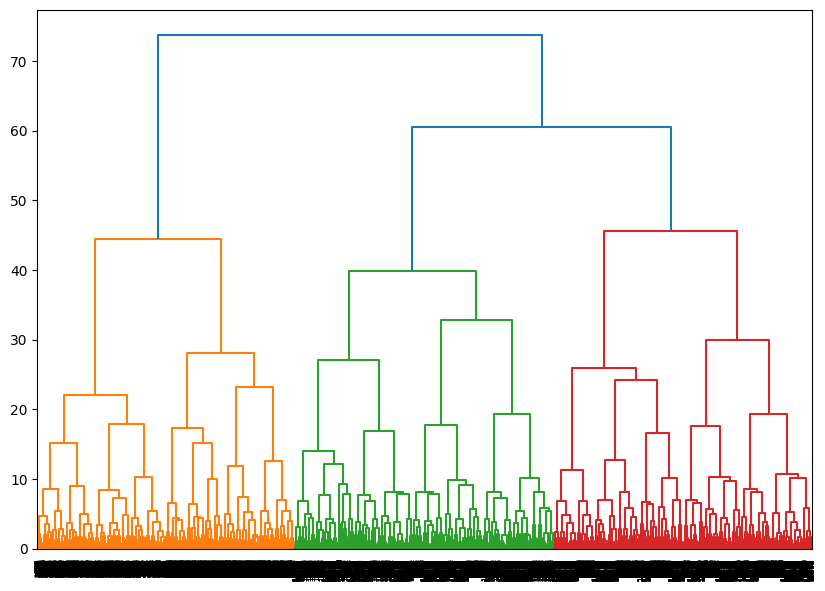

In [177]:
# локоть насчитал 3 кластера, построим дендрограмму тем же методом ward
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
dendro = sch.dendrogram(sch.linkage(df,method='ward'))

In [213]:
# в принципе, видим что 3 кластера - это правильный выбор. выведем массив значнеий для каждого признака
nClust = 3
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [225]:
# посчтиаем очки силуэта.
silhouette_score(df, clusters, metric='euclidean')

0.24769003122273195

In [214]:
# далее попробуем построить распределение кластеров по 2м осям - разным колонкам датафрейма. Зададим список колонок.
col = list(df.columns)
col

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

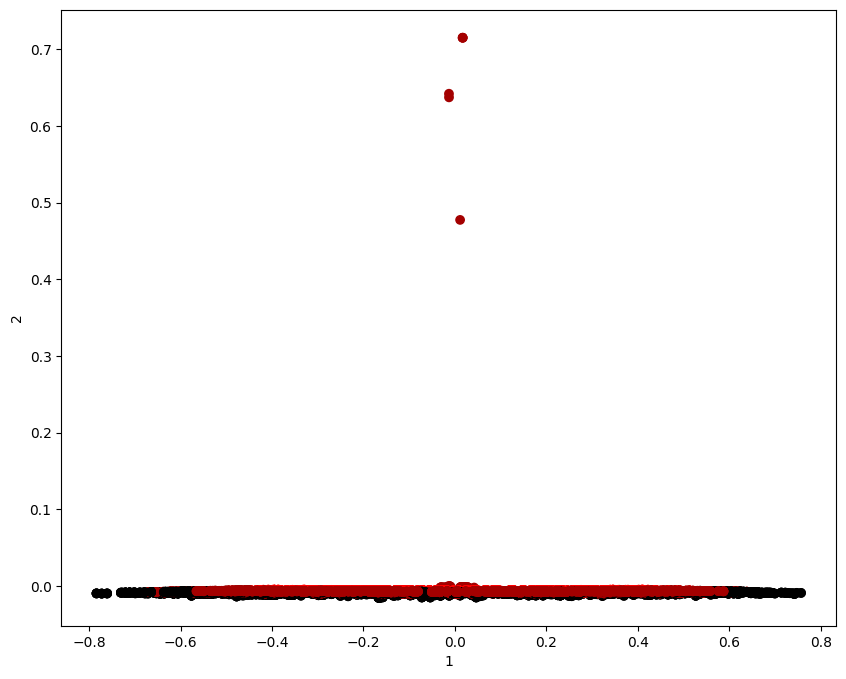

In [215]:
# тут просто меняем x и y на нужные нам оси-колонки.
x=1 
y=2 
plt.figure(figsize=(10, 8))
plt.scatter(df[x], df[y], c=clusters, cmap='flag')
plt.xlabel(col[x])
plt.ylabel(col[y]);
plt.show()

In [216]:
# график не очень информативен. Сформируем основные показатели колонок, в зависимости от кластера.
df_inf['I']=clusters
res=df_inf.groupby('I')[list(df_inf.columns)].mean()
res['Количество']=df_inf.groupby('I').size().values
res

,class,c1,c2,c3,c5,c6,c8,c9,c22,c23,c32,c40,c46,c48,c54,C4_l,c4_r,I,Количество
I,,,,,,,,,,,,,,,,,,,
1,5.459881e+08,-3.445901e+07,1.040736e+06,0.000000e+00,66.00000,200.000000,0.000000,0.000000e+00,1.500000,0.437500,1.5000,1.000000,30.000000,1.000000,2.859422e+08,1.000000,0.000000,1.0,5120
2,5.467779e+08,-2.661756e+07,2.216870e+06,-5.679326e+06,65.49215,201.928668,325557.448343,5.169010e+06,6.692964,0.126346,2.0283,2.490017,29.873619,1.000388,2.835802e+08,0.999031,0.000969,2.0,5159
3,5.459881e+08,1.019911e+07,1.040736e+06,0.000000e+00,66.00000,200.000000,0.000000,0.000000e+00,2.500000,0.242500,1.0000,2.500000,30.000000,1.000000,2.859422e+08,1.000000,0.000000,3.0,5120


In [221]:
# теперь выведем исходный датафрей, добавив к нему колонку с номером кластера, к которому принадлежит строка.
# возможно так более информативно, но в любом случае, не понимая что это за данные и откуда - это просто набор значений,
# которые алгоритм сгруппировал в кластеры по внутренней логике.
df_inf[df_inf['I']==3][list(df_inf.columns)]

,class,c1,c2,c3,c5,c6,c8,c9,c22,c23,c32,c40,c46,c48,c54,C4_l,c4_r,I
5163,545988074,1908851065,1040736,0,30,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,0,1.0,0.0,3
5164,545988074,-1948895452,1040736,0,30,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,1034116331,1.0,0.0,3
5165,545988074,-1948895452,1040736,0,50,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,1034116331,1.0,0.0,3
5166,545988074,1221946338,1040736,0,30,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,-440751703,1.0,0.0,3
5167,545988074,1221946338,1040736,0,30,250.0,0.0,0,2.0,0.25,1.0,2.0,30.0,1.0,-440751703,1.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12838,545988074,360933704,1040736,0,100,150.0,0.0,0,3.0,0.22,1.0,3.0,30.0,1.0,1034116331,1.0,0.0,3
12839,545988074,1258568978,1040736,0,100,200.0,0.0,0,3.0,0.22,1.0,3.0,30.0,1.0,1034116331,1.0,0.0,3
12840,545988074,360933704,1040736,0,100,200.0,0.0,0,3.0,0.22,1.0,3.0,30.0,1.0,1034116331,1.0,0.0,3
12841,545988074,1258568978,1040736,0,100,200.0,0.0,0,3.0,0.22,1.0,3.0,30.0,1.0,1034116331,1.0,0.0,3


In [ ]:
Метод average

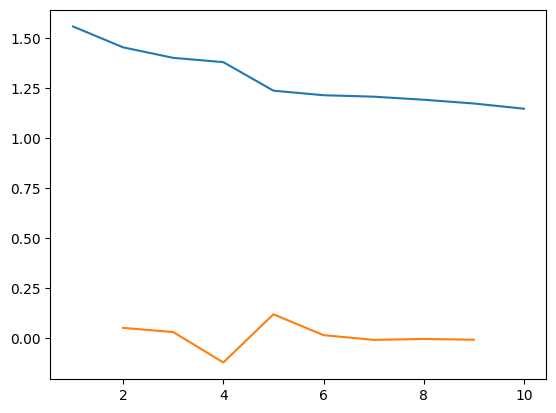

Рекомендованное количество кластеров: 5


In [232]:
# Всё то же самое, что с ward, только другой метод, другое кол-во кластеров.
data_dist = pdist(df, 'euclidean')
data_linkage = linkage(data_dist, method='average')
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

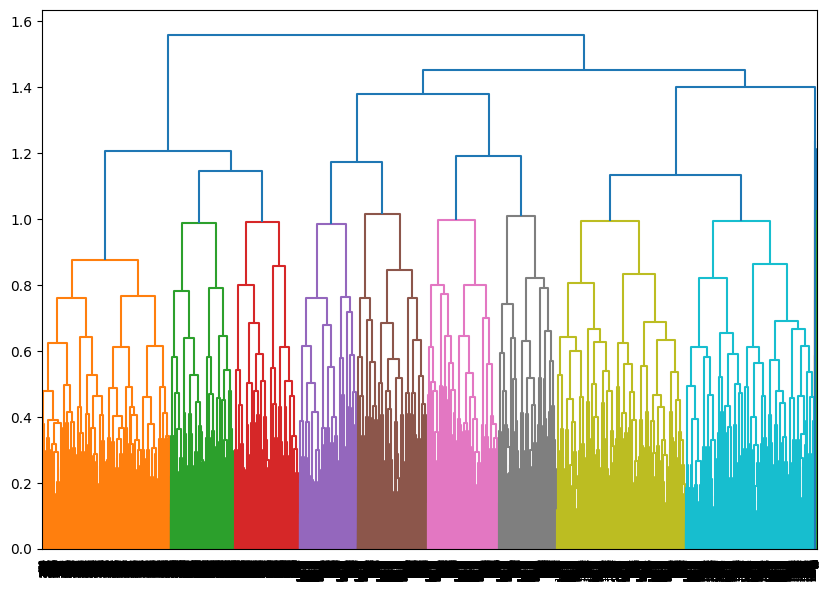

In [220]:
plt.figure(figsize = (10,7))
dendro = sch.dendrogram(sch.linkage(df,method='average'))

In [233]:
# 5 кластеров по локтю, 5 по дендрограмме
nClust = 5
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([5, 5, 5, ..., 4, 4, 4], dtype=int32)

In [234]:
# силуэт лучше, чем в ward
silhouette_score(df, clusters, metric='euclidean')

0.2500890727909778

In [ ]:
Метод complete

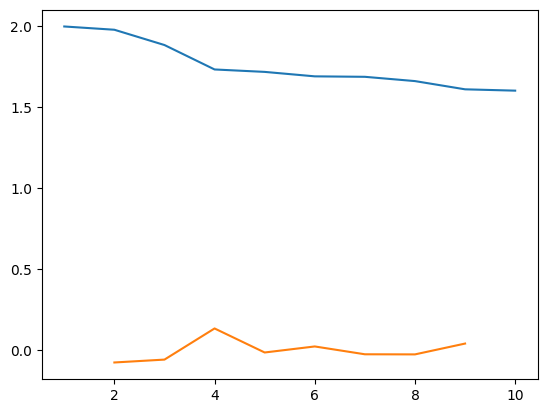

Рекомендованное количество кластеров: 4


In [229]:
data_dist = pdist(df, 'euclidean')
data_linkage = linkage(data_dist, method='complete')
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

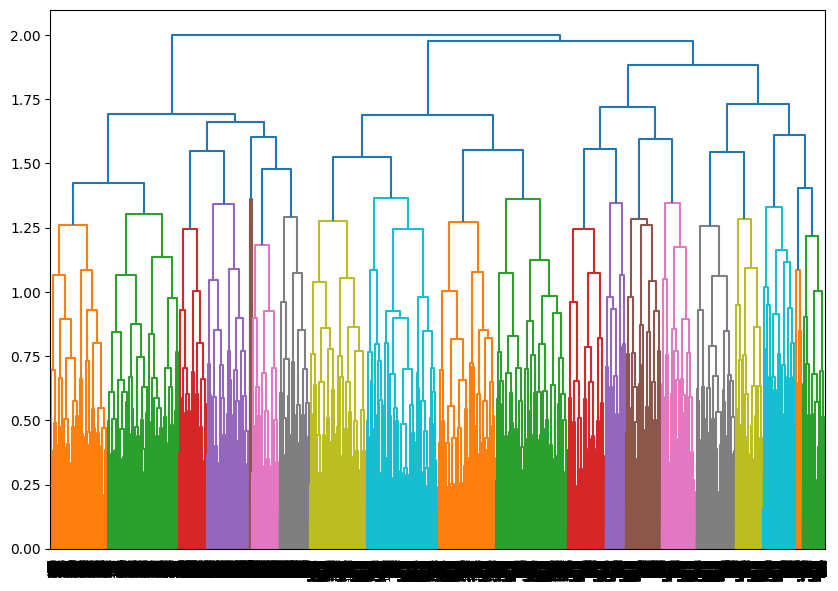

In [223]:
plt.figure(figsize = (10,7))
dendro = sch.dendrogram(sch.linkage(df,method='complete'))

In [230]:
nClust = 4
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [231]:
# лучший силуэт
silhouette_score(df, clusters, metric='euclidean')

0.2549964892011796

In [ ]:
Метод single

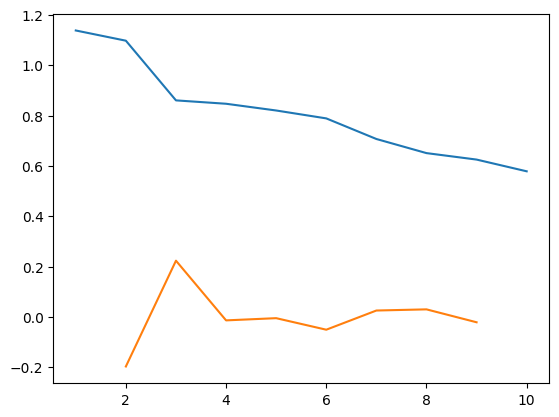

Рекомендованное количество кластеров: 3


In [224]:
data_dist = pdist(df, 'euclidean')
data_linkage = linkage(data_dist, method='single')
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("Рекомендованное количество кластеров:", k)

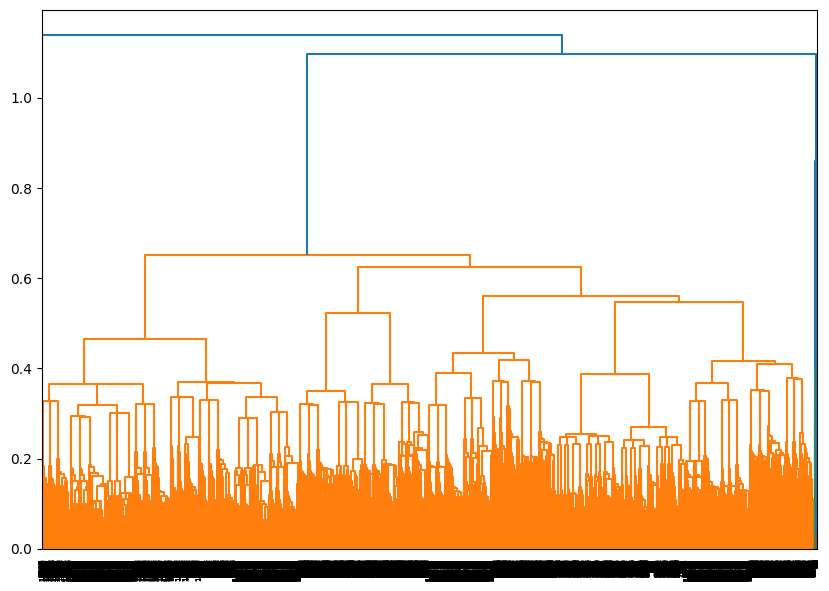

In [226]:
plt.figure(figsize = (10,7))
dendro = sch.dendrogram(sch.linkage(df,method='single'))

In [227]:
nClust = 3
clusters=fcluster(data_linkage, nClust, criterion='maxclust')
clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [228]:
# худший силуэт.
silhouette_score(df, clusters, metric='euclidean')

0.034378559065585505

In [ ]:
Небольшой вывод: по-хорошему нужно построить несколько дендрограмм для каждого метода с разным числом кластеров
    и по каждому кейсу смотреть силуэты. Но, это вне рамок данного таска. Поэтому метод complete с числом кластеров
    4 - лучший.